In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Optional: better looking plots in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['image.cmap'] = 'gray'

print("OpenCV version:", cv2.__version__)

OpenCV version: 4.13.0


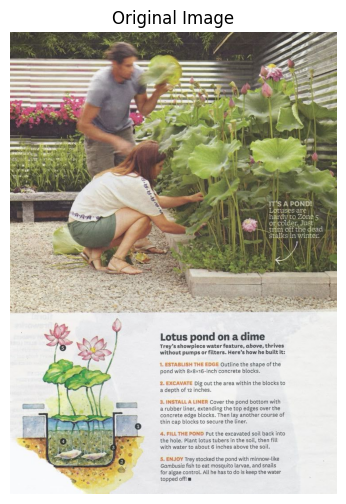

In [8]:
# Change this path to your image
img_path = r"C:\Users\Admin\Downloads\hey.jpg"          # ← put your image here

img = cv2.imread(img_path)
if img is None:
    print("Error: Could not read image. Check path.")
else:
    # Convert BGR → RGB for correct matplotlib display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.title("Original Image")
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

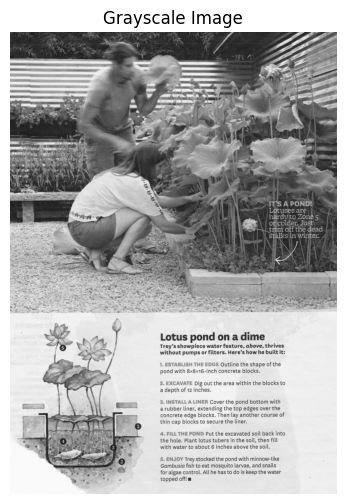

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

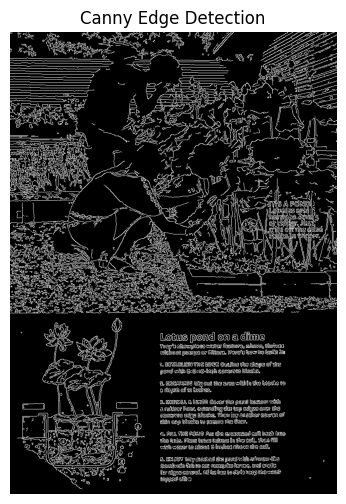

In [10]:
# Canny parameters – most common starting values
edges = cv2.Canny(
    gray,
    threshold1=100,    # lower threshold
    threshold2=200,    # upper threshold
    apertureSize=3,
    L2gradient=False
)

plt.title("Canny Edge Detection")
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

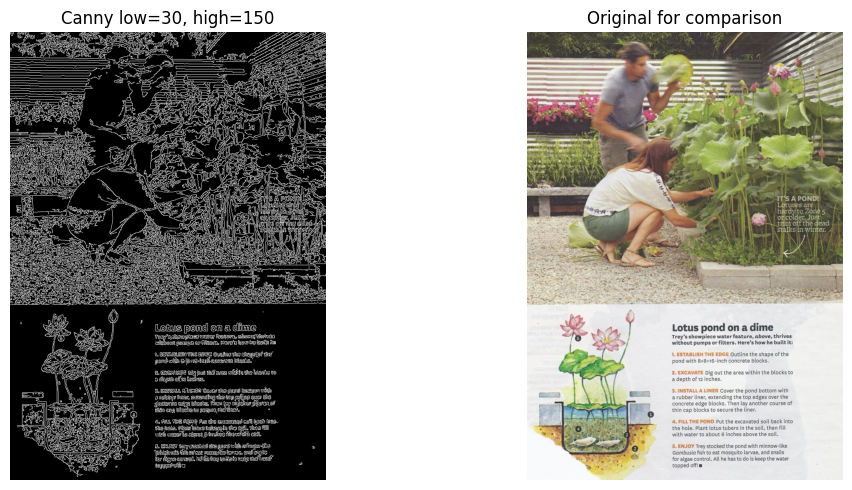

In [11]:
# Quick experiment cell

low  = 30
high = 150

edges2 = cv2.Canny(gray, low, high)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title(f"Canny low={low}, high={high}")
plt.imshow(edges2, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Original for comparison")
plt.imshow(img_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()

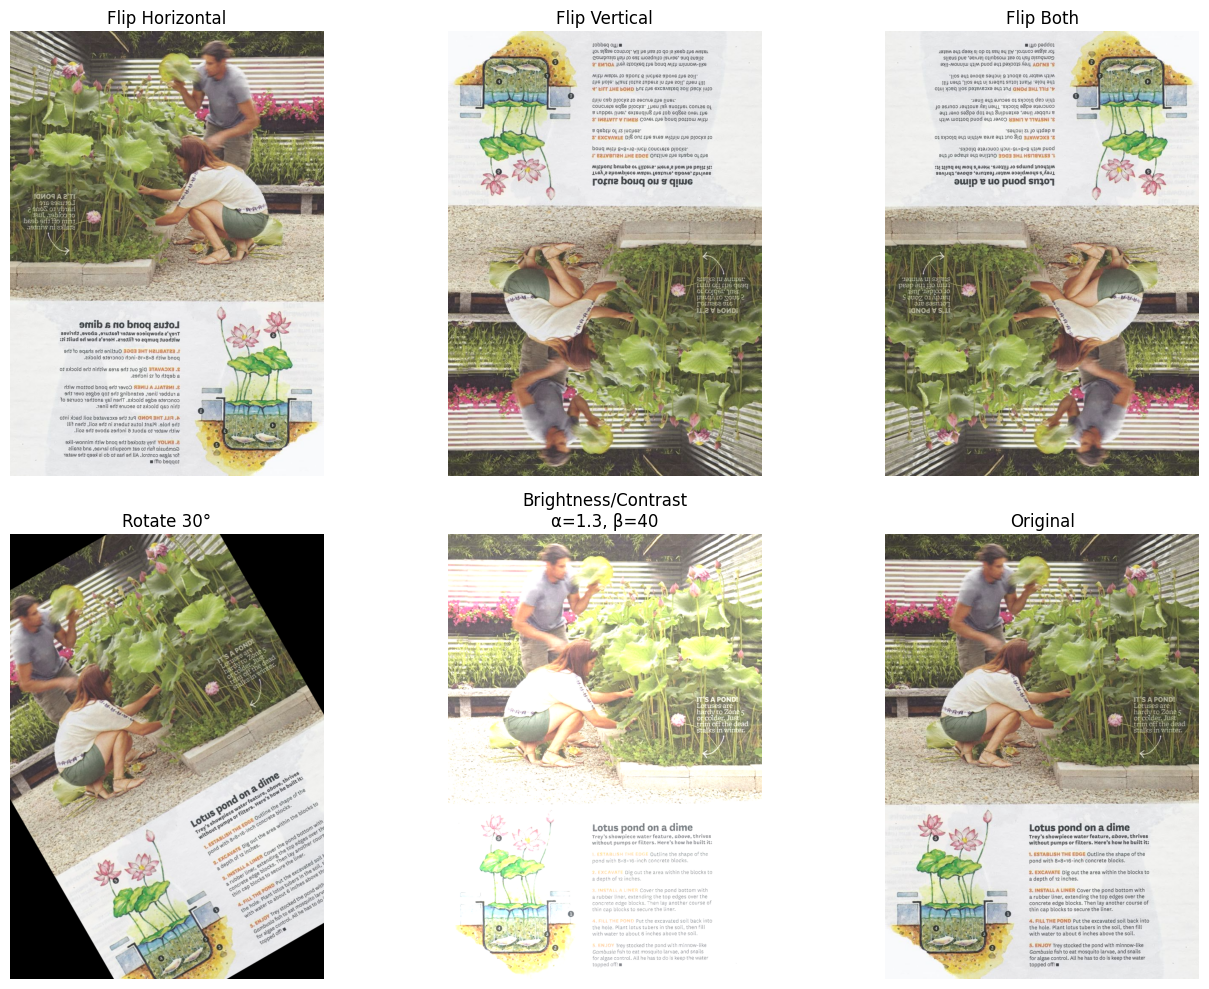

In [12]:
# Augmenting 
# 1. Flip
img_flip_h = cv2.flip(img, 1)      # horizontal
img_flip_v = cv2.flip(img, 0)      # vertical
img_flip_both = cv2.flip(img, -1)  # both

# 2. Rotate (example: 30 degrees)
h, w = img.shape[:2]
M = cv2.getRotationMatrix2D((w/2, h/2), 30, 1.0)
img_rotated = cv2.warpAffine(img, M, (w, h))

# 3. Brightness & contrast adjustment
# alpha → contrast (1.0–3.0), beta → brightness (0–100 common)
alpha = 1.3
beta  = 40
img_bright = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# Display
plt.figure(figsize=(14,10))

plt.subplot(2,3,1); plt.imshow(cv2.cvtColor(img_flip_h, cv2.COLOR_BGR2RGB)); plt.title("Flip Horizontal")
plt.subplot(2,3,2); plt.imshow(cv2.cvtColor(img_flip_v, cv2.COLOR_BGR2RGB)); plt.title("Flip Vertical")
plt.subplot(2,3,3); plt.imshow(cv2.cvtColor(img_flip_both, cv2.COLOR_BGR2RGB)); plt.title("Flip Both")

plt.subplot(2,3,4); plt.imshow(cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB)); plt.title("Rotate 30°")
plt.subplot(2,3,5); plt.imshow(cv2.cvtColor(img_bright, cv2.COLOR_BGR2RGB)); plt.title(f"Brightness/Contrast\nα={alpha}, β={beta}")
plt.subplot(2,3,6); plt.imshow(img_rgb); plt.title("Original")

for ax in plt.gcf().axes:
    ax.axis('off')

plt.tight_layout()
plt.show()